In [1]:
from modflow.FloPy_spyder_transient_2 import ModFlow_dike
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Flood Defences Assignment - Backward erosion piping
Created by: Lisa van der Linde

Date: 03-05-2023

The assignment and underlying package is solely for educational purposes.


## About this assignment
The assignment consists of two main parts and a bonus part. First analytical methods will be used to determine if backward erosion piping occurs and some simple counter measures are designed. In the second part we will use groundwater modelling to analyse what happens in more complex cases. In the bonus part we will consider a new situation where a blanket layer is present. To run the code you need to have several packages installed. To not mess-up your other code and packages create a new environment. Run the following commands in the anaconda command prompt:

* conda create --name flopy_env
* conda activate -- flopy_env
* conda install pip
* pip install notebook
* pip install flopy==3.3.4
* pip install shapely
* pip install fiona
* pip install pandas

Close the current instance of jupyter notebook and restart jupyter notebook by running the following command in the anaconda command prompt: 

* jupyter notebook

## The process

Backward erosion piping is one of the failure mechanisms of dikes and other waterretaining structured. In Backward Erosion Piping groundwater flow leads to the removal of sediments at the toe of the dike. Hollow erosion channels "pipes" form underneath the dike. Equilibrium can occur when the pipe has progressed until approximately 1/6th to 1/2nd of the dike width. If the water level increases further the pipe will progress untill the upstream waterlevel (river/sea) is reached, when the pipe connects to the upstream water level, the discharge through the pipe leads to an extreme widening of the pipe. The foundation looses bearing capacity and the dike collapses leading to flooding of the hinterland. 

## The case
There are several methods to determine if backward erosion piping is occuring. In this assignment we will be looking at 3 analytical methods and do some groundwaterflow modelling, to determine if the dike shown in the image below is safe against backward erosion piping and how different countermeasures impact backward erosion piping. The measurable parameters are shown in the table below. 

<img src="BEP image.png" width="800" height="400">

| Name | Parameter | Value |Unit|
| --- | --- | --- | --- |
| Aquifer depth | D | 10 | m |
| Seepage Length | L | 85 | m |
| Design water level | H | 9 | m |
| Hydraulic conductivity | k | 47 | m/d |
| Grainsize (70%) | $d_{70}$ | 398 | $\mu m$ |
| Gravitational accelation | g | 9.81 | $\frac{m}{s^2}$ |
| Kinematic viscosity of water | $\nu$ |  1.33 $E^{-6}$ | $\frac{m^2}{s}$ |



## Part 1 - Analytical models


### Question 1a piping Bligh

In the beginning of the 19th century, dam failures in India were analysed and it was discovered that internal erosion was one of the culprits. A relation was developed linking the hydraulic gradient to the likelyhood of internal erosion occuring. 

\begin{equation}
\frac{\Delta H_c}{L} = \frac{1}{C_{Bligh}}
\end{equation}

In this equation $L$ [m] is the seepage length, $\Delta H$ [m] is the hydraulic head difference and $C_{Bligh}$ is a material dependent creep factor. 


| Soil type | Creep coefficient (Bligh) |
| --- | --- |
| Very fine sand | 18 |
| Mildly fine sand | 15 |
| Extremely coarse sand | 12 |
| fine gravel | 9 |

Determine is the dike is safe against backward erosion piping according to Bligh (1910). Define a limit state function Z (= critical value - occuring/design value) based on the difference between the design water level and the critical water level.  Explain which creep coefficient you chose and why. 


In [ ]:
def Limit_state_Bligh(L, H, C_Bligh):
    H_c = 
    Z = 
    return Z, Hc

Zb = Limit_state_Bligh(L, H, C_Bligh)[0]

if Zb ...:
    
    print("Piping can occur")
else:
    print("Piping cannot occur")
    
    
"""
Explanation:


"""

### Question 1b Selmeijer

In the late 20th century more research was conducted on backward erosion piping. Experiments were designed and conducted to link backward erosion piping to the geometry of the aquifer and properties of the soil. Sellmeijer (1988) created a mathematical semi-analytical model, which combined groundwaterflow towards the pipe, with pipe flow and erosion inside the erosion channel. In the early 2000s the model was calibrated using experiments at multiple scales. This resulted the design rule Sellmeijer (2011), which is currently applied in Dutch standards. 

\begin{equation}
\frac{\Delta H_c}{L} = F_{r}*F_{s}*F_{g}
\end{equation}

The resistance ($F_r$), scale ($F_s$) and geometry ($F_g$)factors are defined as follows:


$
\begin{align}
F_{r} = \eta * \frac{\gamma'_p}{\gamma_w}*tan(\theta)\\
F_{s} = \frac{d_{70,m}}{\sqrt[3]{\kappa*L}}*\left(\frac{d_{70}}{d_{70,m}}\right)^{0.4}; \kappa = \frac{\nu}{g} k \\
F_{g} = 0.91 *\left(\frac{D}{L}\right)^{\frac{0.28}{\left(\frac{D}{L}\right)^{2.8}-1}+0.04}\\
\end{align}
$


| Name | Parameter | Value |Unit|
| --- | --- | --- | --- |
| Unit weight of submerged particles | $\gamma'_{p}$ | 16.5 | kN/m^3 |
| Unit weight of water | $\gamma_{w}$ | 10 | kN/m^3 |
| White’s coefficeint | $\eta$ | 0.25 | - |
| Reference $d_{70}$ (from calibration on experiments) | $d_{70,m}$ | 208 | $\mu m$ |
| Bedding angle | $\theta$ | 37 | $^o$ |

Determine if the dike is safe against backward erosion piping using Sellmeijer (2011)? Define a limit state function to compare the design water level with the critical water level.  Pay attention to the units, the design rule is in SI units, while the given parameters are not. 


In [ ]:
def Limit_state_Sellmeijer(L, H, .....):
    F_r = 
    F_s =
    F_g
    H_c = 
    Z = 
    return Z, Hc

Zs = Limit_state_Sellmeijer(L, H, .....)[0]

if Zs ...: 
    print("Piping can occur")
else:
    print("Piping cannot occur")

### Question 1c: sensitivity analysis Sellmeijer

Explain what the influence is of the hydraulic conductivity ($k$), aquifer depth ($D$) and grainsize ($d_{70}$) on the critical head. The range of $d_{70}$ should be 150-430 $\mu m$. Choose a range of hydraulic conductivities and aquifer depths yourself, but explain why you choose this range. 

Feel free to use dinoloket (https://www.dinoloket.nl/en/subsurface-models/map) to check some common aquifer depths and hydraulic conductivities along rivers in different parts of the Netherlands.  

Create 3 plots, with on the y-axis the critical head ($H_c$) and on the x-axis the parameters mentioned above. Explain your findings. 


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ax1.plot(...) # k
ax2.plot(...) # D
ax3.plot(...) # d70

ax1.set_xlabel("Hydraulic conductivity k [...]")
ax2.set_xlabel("Aquifer depth D [m]")
ax3.set_xlabel("Grainsize d70 [...]")


"""
Explanation
"""

### Question 1d: Adding a berm to the dike

If all parameters were filled out correctly, the dike should fail with both Sellmeijer and Bligh. Your first idea to solve this problem is to increase the width of the dike and thereby the seepage length. How large should the seepage length be to design a dike that is safe against backward erosion piping. Write a piece of code to determine what the seepage length should be. What is the required seepage length?

*Hint: an iterative approach is required for Sellmeijer.*

In [ ]:
# write your code here


"""
Answer
"""

### Question 1e: Sheet pile wall

Due to housing 20 meters behind the inner toe of the current dike. The berm you designed is not suitable. Therefore you have to look for alternatives. One of those alternatives is to install a sheetpile wall, thereby increasing the seepage length. However Sellmeijer 2011 is not suited for this situation. The equation by Lane (1935), was specifically developed for this situation. See the equation below. 

\begin{equation}
\Delta H_c = \frac{\frac{1}{3}L_{horizontal} + L_{vertical}}{C_{Lane}}
\end{equation}

Define the limit state equation for Lane and calculate how deep the sheetpile wall should be. 

| Soil type | Creep coefficient (Lane) |
| --- | --- |
| Very fine sand | 7 |
| Mildly fine sand | 7 |
| Extremely coarse sand | 5 |
| fine gravel | 4 |


## Part 2 - Numerical modeling

In this part of the exercise we will use groundwater modelling to determine how BEP is influenced by more complex geometries. In practice you never see a perfect/simple dike. In the field dikes often have a foreshore, a hinterland, complex geometries, a heterogeneous aquifer etc. Some of these atributes you can encounter are shown in the image below. 

<img src="BEP image_complicated.png" width="800" height="400">

In case of such a complex geometry additional models are required to estimate the influence of these attributes. Alternatively numerical modelling can be used to analyse these situations. In this assignment we use is a groundwater flow model named modflow6, which is controlled via the flopy package. The program solves Darcy's law in 3 dimensions, using finite differences. All exersices in this part are pre-programmed, your task is to interpret the results. Run the code blocks below and answer the questions related to the figures. The computations can take some time, so you have to exert a bit of patience. The code blocks are divided as follows:

* set-up and run computation. (this takes some time)
* create a cross-section plot and save the results to a txt file. 
* create a line plot at the top of the aquifer showing the Total head over the distance in x. 


### Question 2a Outflow hinterland

In practice you can come across different types of outflow locations. Two types are modelled here 1) an open type exit, where water can flow freely onto the hinterland. Or ditch type exit, which occurs when there is a ditch along the inner toe of the dike. Water cannot flow freely towards the interland due to the presence of a blanket layer. 

Is piping more or less likely to initiate with a ditch type of exit? Explain your answer.

Run the 3 code blocks below. 

In [2]:
# create a local folder on your computer to store the output
path = r"C:\Users\emvanderlinde\Documents\PhD\Chapters\TUD-Dissertation\Literature\Figures" 

In [3]:
Open_name = "Open"
Ditch_name = "Ditch"

# Parameters
model1 = ModFlow_dike(Ditch_name)
model1.N_wall = 0  # there is no sheetpile wall
model1.Boil = False # There is no sand boil
model1.nper=2
model1.W_ditch = 10

# Run the calculation
model1._calc_variables()
model1._setup_model()
model1._discretize()
model1._set_IC()
model1._set_BC()
model1._set_sheetpile()
model1._create_OC()
model1._run_model()
model1.get_output()


# Parameters
model2 = ModFlow_dike(Open_name)
model2.N_wall = 0  # there is no sheetpile wall
model2.Boil = False # There is no sand boil
model2.nper=2
model2.W_ditch = 420

# Run the calculation
model2._calc_variables()
model2._setup_model()
model2._discretize()
model2._set_IC()
model2._set_BC()
model2._set_sheetpile()
model2._create_OC()
model2._run_model()
model2.get_output()

C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Ditch...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 600 based on size of stress_period_data
    writing package hfb...
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant t

C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\envs\flopy\Lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Open...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 4700 based on size of stress_period_data
    writing package hfb...
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant t

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


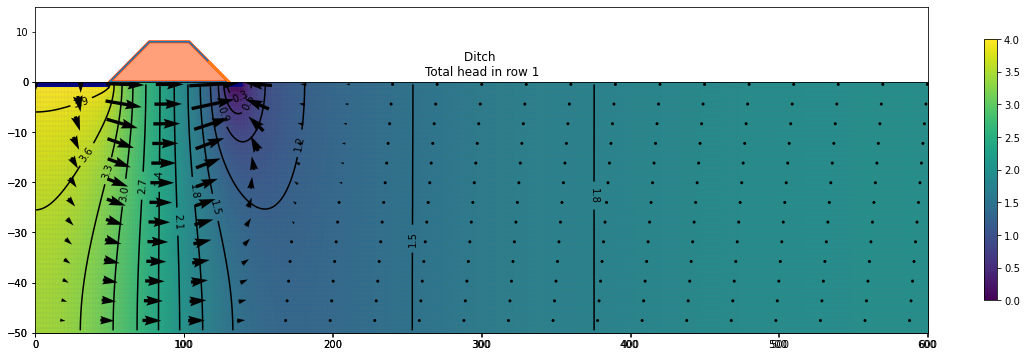

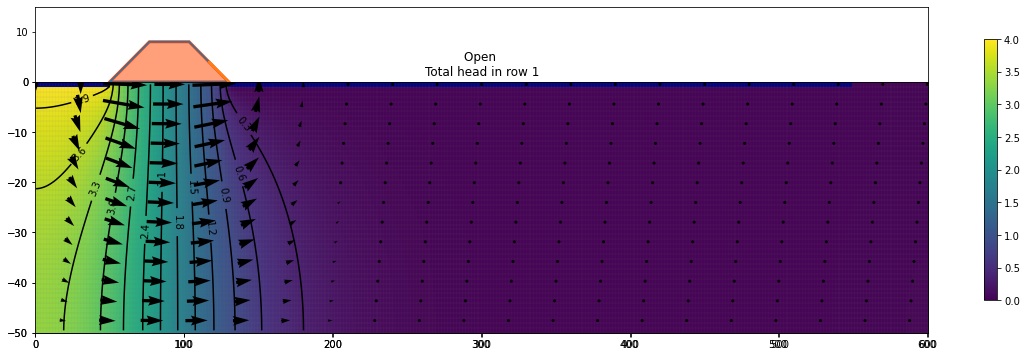

In [5]:
# Create cross section plots
model1.plot_cross(1)
model2.plot_cross(1)

# Save data
model2.save_data(path)
model1.save_data(path)

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Head [m]')

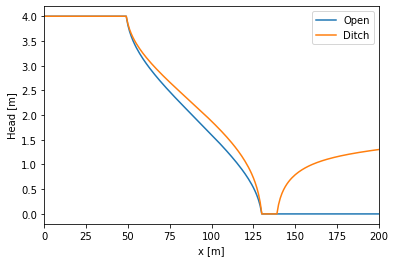

In [6]:
Result_Open = np.loadtxt(os.path.join(path, Open_name +".txt"))
Result_Ditch = np.loadtxt(os.path.join(path, Ditch_name +".txt"))

fig, ax = plt.subplots()
ax.plot(Result_Open[0], Result_Open[1], label="Open")
ax.plot(Result_Ditch[0], Result_Ditch[1], label = "Ditch")
ax.set_xlim(0,200)
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("Head [m]")


In [ ]:
"""
Explanation


"""

### Question 2b River cut-in



A river often has a depth that is in direct contact with the sandy aquifer. In the next model this is simulated by applying the constant head boundary condition also along the left side of the model.  To answer this question use the 3 code blocks below

How does a cut-in depth of 10 m influence the outcome of your calculations? Explain, is this what you would expect explain why, use the word scale in your explanation? 
*Hint: Feel free to repeat the calculation with a larger cut_in_depth*.

In [7]:
River_name = "Open_river_cutin"

# Parameters
model3 = ModFlow_dike(River_name)
model3.N_wall = 0  # there is no sheetpile wall
model3.Boil = False # There is no sand boil
model3.nper=2
model3.W_ditch = 420
model3.cut_in_depth = 10

# Run the calculation
model3._calc_variables()
model3._setup_model()
model3._discretize()
model3._set_IC()
model3._set_BC()
model3._set_sheetpile()
model3._create_OC()
model3._run_model()
model3.get_output()

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils inste

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Open_river_cutin...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 4790 based on size of stress_period_data
    writing package hfb...
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


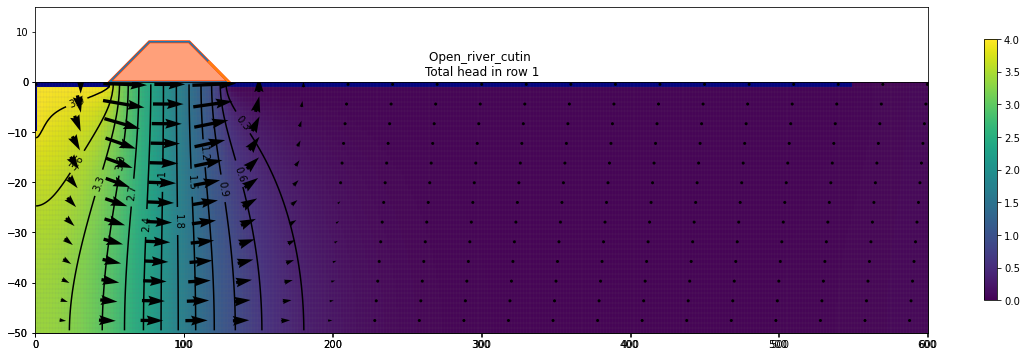

In [8]:
# Create cross section plot
model3.plot_cross(1)

# Save data
model3.save_data(path)

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Head [m]')

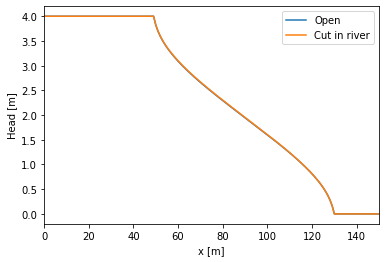

In [9]:
# Load data
Result_River = np.loadtxt(os.path.join(path, River_name +".txt"))

# Create figure to compare
fig, ax = plt.subplots()
ax.plot(Result_Open[0], Result_Open[1], label="Open")
ax.plot(Result_River[0], Result_River[1], label = "Cut in river")
ax.set_xlim(0,150)
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("Head [m]")

In [ ]:
"""
Explanation


"""

### Question 2c Foreshore

In [10]:
Foreshore_name = "Open_foreshore"

# Parameters
model4 = ModFlow_dike(Foreshore_name)
model4.N_wall = 0  # there is no sheetpile wall
model4.Boil = False # There is no sand boil
model4.nper=2
model4.W_ditch = 420
model4.cut_in_depth = 10
model4.blanket_layer = 2
model4.only_foreshore = True
model4.kc = 0.5

# Run the calculation
model4._calc_variables()
model4._setup_model()
model4._discretize()
model4._set_IC()
model4._set_BC()
model4._set_sheetpile()
model4._create_OC()
model4._run_model()
model4.get_output()

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils inste

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Open_foreshore...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 4790 based on size of stress_period_data
    writing package hfb...
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 


C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


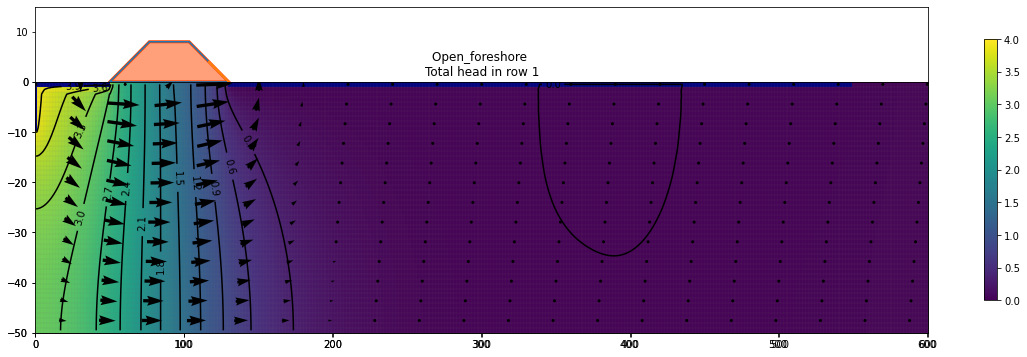

In [11]:
# Create cross-section plot
model4.plot_cross(1)

# Save data
model4.save_data(path, depth = 2)

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


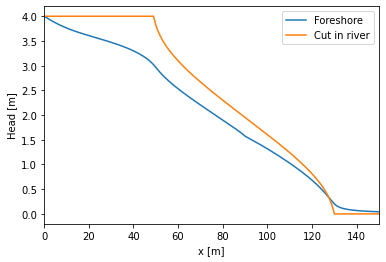

In [12]:
# Load data
Result_Foreshore = np.loadtxt(os.path.join(path, Foreshore_name +".txt"))


# Create comparison figure
fig, ax = plt.subplots()
ax.plot(Result_Foreshore[0], Result_Foreshore[1], label="Foreshore")
ax.plot(Result_River[0], Result_River[1], label = "Cut in river")
ax.set_xlim(0,150)
ax.set_xlabel("x [m]")
ax.set_ylabel("Head [m]")
ax.legend()

In [ ]:
"""
Explanation


"""

### Question 2d Sheetpile wall

Explain how a sheetpile wall can help against backward erosion piping. To answer this question run the 3 code blocks below. Feel free to vary the parameters, such as N_wall (the depth of the wall expressed as the number of gridcells) and Part_wall (the location of the wall underneath the dike 1/x)

In [16]:
Sheetpile = "Sheetpile"

# Parameters
model5 = ModFlow_dike(Sheetpile)
model5.N_wall = 15
model5.Part_wall = 2 # meaning it is located at 1/x of the dike base. For x=2, the wall is located halfway along the dike base.
model5.Boil = False # There is no sand boil
model5.nper=2
model5.W_ditch = 420
model5.cut_in_depth = 10
model5.blanket_layer = 2
model5.only_foreshore = True
model5.kc = 0.5

# Run the calculation
model5._calc_variables()
model5._setup_model()
model5._discretize()
model5._set_IC()
model5._set_BC()
model5._set_sheetpile()
model5._create_OC()
model5._run_model()
model5.get_output()

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils inste

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Sheetpile...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 4790 based on size of stress_period_data
    writing package hfb...
INFORMATION: maxhfb in ('gwf6', 'hfb', 'dimensions') changed to 150 based on size of stress_period_data
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


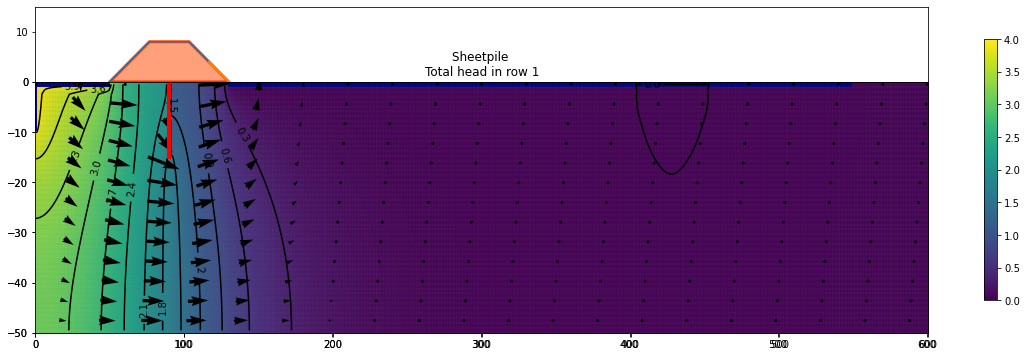

In [14]:
# Create cross-section plot
model5.plot_cross(1)

# Save data
model5.save_data(path, depth = 2)

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


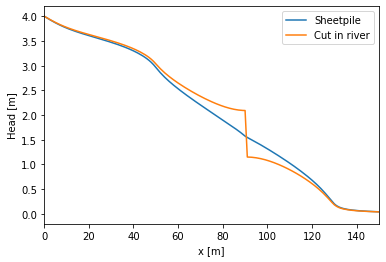

In [15]:
# Load data
Result_Sheetpile = np.loadtxt(os.path.join(path, Sheetpile +".txt"))


# Create comparison figure
fig, ax = plt.subplots()
ax.plot(Result_Foreshore[0], Result_Foreshore[1], label="Foreshore")
ax.plot(Result_Sheetpile[0], Result_Sheetpile[1], label = "Sheetpile")
ax.set_xlim(0,150)
ax.set_xlabel("x [m]")
ax.set_ylabel("Head [m]")
ax.legend()

In [ ]:
"""
Explanation


"""

### Question 2e Pipe

In the following examples a high permeability rectangle at the top of the aquifer, from the inner toe untill halfway across the seepage length. This represents the pipe (Note: this is not the most accurate way to represent the pipe, the depth is in reality not constant over the length of the pipe and the higher permeability should be based on pipe-flow equations.) 

Explain the difference head profile. Does this make sense to you?

In [26]:
Open_name = "Open"
Pipe_name = "Pipe"

# Parameters
model6 = ModFlow_dike(Pipe_name)
model6.N_wall = 0  # there is no sheetpile wall
model6.Boil = False # There is no sand boil
model6.nper=2
model6.pipe = True
model6.pipe_grogression = 0.5
model6.pipe_w = 1
model6.W_ditch = 10

# Run the calculation
model6._calc_variables()
model6._setup_model()
model6._discretize()
model6._set_IC()
model6._set_BC()
model6._set_sheetpile()
model6._create_OC()
model6._run_model()
model6.get_output()

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:147: DeprecationWarning: SpatialReference has been deprecated and will be removed in version 3.3.5. Use StructuredGrid instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(
C:\Users\emvanderlinde\Anaconda3\lib\site-packages\flopy\utils\reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils inste

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model Pipe...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 600 based on size of stress_period_data
    writing package hfb...
    writing package oc...
FloPy is using the following executable to run the model: .\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

   MODFLOW 6 compiled Jul 30 2021 14:34:58 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


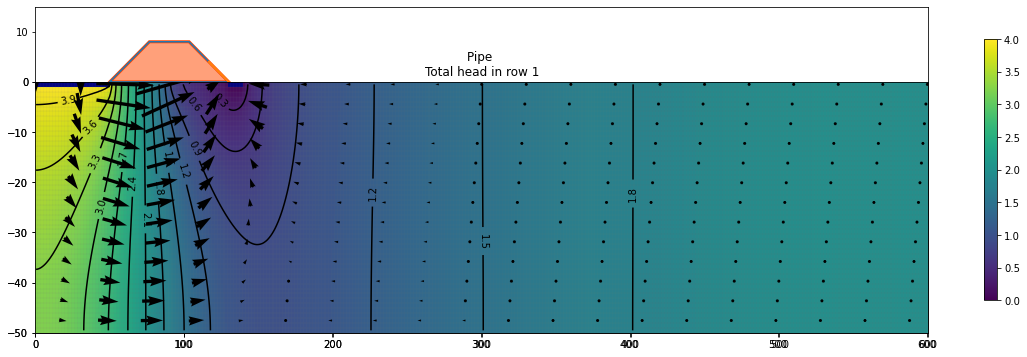

In [27]:
# Create cross-section plot
model6.plot_cross(1)

# Save data
model6.save_data(path, depth = 0)

C:\Users\emvanderlinde\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Head [m]')

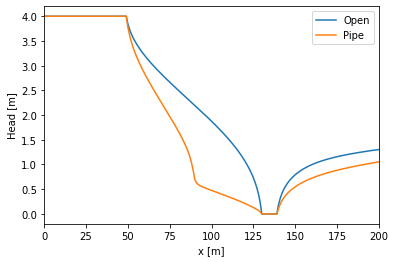

In [28]:

Result_Pipe = np.loadtxt(os.path.join(path, Pipe_name +".txt"))

fig, ax = plt.subplots()
ax.plot(Result_Ditch[0], Result_Ditch[1], label="Ditch")
ax.plot(Result_Pipe[0], Result_Pipe[1], label = "Pipe")
ax.set_xlim(0,200)
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("Head [m]")


## Part 3 - Uplift and heave


<img src="Uplift image_complicated.png" width="800" height="400">

If an impermeable blanket layer is present at the inner toe of the dike, then this first an opening needs to be created for sediment to be transported out of the aquifer. In the Netherlands this is assumed to occur when uplift occurs. The limit state function is given below:

\begin{equation}
Z_{u} = \Delta \phi_{c,u} - (\phi_{exit} - h_{exit})
\end{equation}

The pressure potential is calculated using the equation below:

\begin{equation}
\Delta \phi_{c,u} = \frac{D_{blanket}*(\gamma_{sat}-\gamma_{water})}{\gamma_{water}}
\end{equation}

Assuming the same design water level as part 1 and a clay layer of 4 meters thick, the saturated unit weight of the clay is $\gamma_{sat}= 16 kN/m^3$. 


### Question 3a.
In the most conservative scenario ($\phi_{exit}=h$ and $h_{exit}=\phi_{polder} = 0$) Can uplift occur? 



In [ ]:
def pressure_potential(D, gamma_sat, gamma_water):
    
    return phi_cu


def uplift_limit_state(phi_cu, phi_exit, h_exit):
    
    return Zu

if Zu ...:
    print("Uplift can occur")
else:
    print("Uplift cannot occur")

### Question 3b

Why is it conservative to assume $\phi_{exit} = h$? 

### Question 3c 

In practice a reduction coefficient $r_{exit}$ is applied to determine the head underneath the blanketlayer at the inner toe of the dike. The waterpressure below the blanketlayer now becomes:

\begin{equation}
\phi_{exit} = \phi_{polder} + r_{exit}*(h-\phi_{polder})
\end{equation}

Use the equation above to recalculate the limit state, can uplift occur? Assume $r_{exit}=0.7$. Explain how you would determine $r_{exit}$ when you are designing a real dike. 

In [ ]:
def exit_pressure(phi_polder, r_exit, h):
    
    return phi_exit

### Question 3d Heave

Besides uplift grains must also be transported throught the blanket layer, therefore the vertical seepage velocity must be large enough. This is assessed by means of the heave criterion, which is shown below. 

\begin{equation}
Z_{h} = i_{c,h} - i
\end{equation}

\begin{equation}
i = \frac{\phi_{exit} - h_{exit}}{D_{blanket}}
\end{equation}

Can heave occur? Assume a critical heave gradient $i_{c,h}$ of 0.5.


## Question 3e

If your dike with blanket layer fails the criteria for heave and backward erosion piping, but is save against uplift. Can your dike fail due to backward erosion piping? Explain your answer. 